In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import glob


In [ ]:
files = glob.glob('/content//*.csv')
files

['/content/Youtube02.csv',
 '/content/Youtube01.csv',
 '/content/Youtube03.csv',
 '/content/Youtube04.csv',
 '/content/Youtube05.csv']

In [ ]:
all_df = []

for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis=1))

all_df[0]

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
345,This song means so much to me thank you soooo...,0
346,&lt;3﻿,0
347,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,Honestly speaking except taylor swift and adel...,0


In [ ]:
data = pd.concat(all_df, axis=0,ignore_index = True)
data

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free ...,1
1,http://www.billboard.com/articles/columns/pop-...,1
2,Hey guys! Please join me in my fight to help a...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [ ]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

# Sample 1

In [ ]:
message_sample = ['This is a dog']

In [ ]:
vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message_sample) #fitting
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]])

In [ ]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [ ]:
vectorizer_sample.transform(['This is a cat']).toarray()
# The word cat was not in the fitting part, so it doesn't appear

array([[0, 1, 1]])

# Sample 2

In [ ]:
message_sample2 = ['This is a dog and that is a dog','This is a cat']
vectorizer_sample2 = CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()
    

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]])

In [ ]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [ ]:
vectorizer_sample2.transform(['Those are birds']).toarray()
# None of the words were in the fitting process

array([[0, 0, 0, 0, 0, 0]])

# Defining the inputs and the target. Creating the train-test split


In [ ]:
inputs = data['CONTENT']
target = data['CLASS']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size = 0.2, random_state=365,stratify = target)

In [ ]:
#y_train.value_counts(normalize = True)
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [ ]:
#y_test.value_counts(normalize = True)
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

# Tokenizing the YouTube comments

In [ ]:
# Always split test and train before the vectorizer fit transform

vectorizer = CountVectorizer()

x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_transf.shape

(1564, 3869)

In [ ]:
x_test_transf.shape

(391, 3869)

# Performing Classification

In [ ]:
clf = MultinomialNB(class_prior = np.array([0.6,0.4]))

In [ ]:
clf.fit(x_train_transf,y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [ ]:
clf.get_params()
# Alpha is the smoothing parameter (linear coefficient)

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

In [ ]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

# Evaluation on the test dataset

In [ ]:
y_test_pred = clf.predict(x_test_transf)

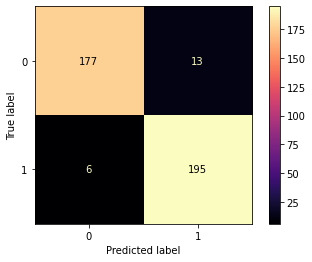

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test,y_test_pred,labels = clf.classes_,
    cmap= 'magma'
)

# 0 = Ham and 1 = Spam
# 166 is True Negatives(TN)
# 24 is False Positives (FP)
# 9 is False Negatives (FN)
# 192 is True Positives (TP)

In [ ]:

print(classification_report(y_test,y_test_pred, target_names= ['Ham','Spam'] ))
# Accuracy = Correctly predicted samples divided by All samples
# Accuracy = TN + TP / TN + FP + FN + TP (formula)
# Precision accurracy for a specific class (Correctly identified spam over
# all samples classified as spam)
# Precision = TP / TP + FP (formula)
# Recall is spam comments that the model has caught
# Recall = TP / TP + FN (formula)
# F1 score is the harmonic mean of precision and recall
#  F1 = 2 / (1/precision + 1/recall) (formula)

              precision    recall  f1-score   support

         Ham       0.97      0.93      0.95       190
        Spam       0.94      0.97      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



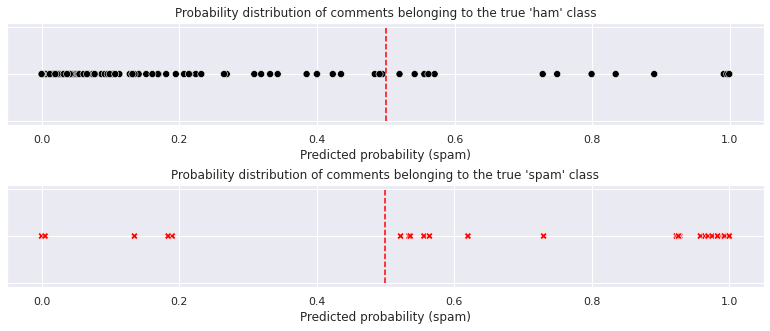

In [ ]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter ['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette (['#000000'])
palette_1 = sns.color_palette (['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad =3)

sns.scatterplot(x = 'Predicted probability (spam)',
y = np.zeros(df_scatter_0.shape[0]),
data = df_scatter_0,
hue = 'True class',
s = 50,
markers = ['o'],
palette = palette_0,
style = 'True class',
legend = False,
ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red')

sns.scatterplot(x = 'Predicted probability (spam)',
y = np.zeros(df_scatter_1.shape[0]),
data = df_scatter_1,
hue = 'True class',
s = 50,
markers = ['X'],
palette = palette_1,
style = 'True class',
legend = False,
ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
ax2.vlines(0.5,-1,1, linestyles = 'dashed', colors = 'red')

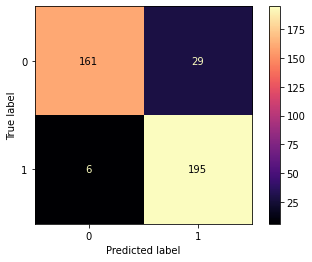

In [ ]:
sns.reset_orig()

clf = MultinomialNB()
clf.fit(x_train_transf,y_train)
clf.get_params()
y_test_pred = clf.predict(x_test_transf)

ConfusionMatrixDisplay.from_predictions(
    y_test,y_test_pred,labels = clf.classes_,
    cmap= 'magma'
)

In [ ]:
np.exp(clf.class_log_prior_)

#Naïve Bayes Classifiers showed to be very good Predictors,but very bad Estimators

array([0.48657289, 0.51342711])

# Making predictions



In [ ]:
predict_data = vectorizer.transform(['I love this song so much, it reminds me of my childhood',
                                    'Do you want to work from home and become and millionaire? Buy my course and ill show you how'])


In [ ]:
clf.predict(predict_data)

# The predictions is that the first comments is Ham and the second is Spam

array([0, 1])